# Machine Learning Assignment 1
### Lamya Daakir                          
ldaakir3                           
GTID# : 903529703                 
CS 7641

# Importing the necessary libraries

In [117]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
import seaborn as sns
sns.set()
from pandas import Series, DataFrame
from sklearn.metrics import plot_confusion_matrix
import time
from matplotlib.legend_handler import HandlerLine2D
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold, ShuffleSplit, KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, accuracy_score

# Plotting

### https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html

In [148]:
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

In [119]:
model_accuracies = {'DT':1, 'ANN':1, 'Boosting':1, 'SVM':1, 'KNN':1}

# Data Analysis

In [202]:
dataset = pd.read_csv('seismic.csv', header = None)
dataset.shape

(726, 20)

In [203]:
dataset.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,id,seismic,seismoacoustic,shift,genergy,gpuls,gdenergy,gdpuls,ghazard,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,nbumps6,nbumps7,nbumps89,energy,maxenergy,class
1,1,a,a,W,37640,596,37,58,a,0,0,0,0,0,0,0,0,0,0,0
2,2,a,b,W,42930,341,54,-11,a,5,2,3,0,0,0,0,0,6200,3000,0
3,3,b,b,W,45470,573,64,65,a,8,5,2,1,0,0,0,0,33600,20000,0
4,4,b,b,W,17150,198,-39,-44,a,3,1,1,1,0,0,0,0,24200,20000,0


In [204]:
X = dataset.iloc[1:, 1:19].values
Y = dataset.iloc[1:, 19].values

In [205]:
X.shape


(725, 18)

In [206]:
Y.shape


(725,)

In [207]:
X[0]

array(['a', 'a', 'W', '37640', '596', '37', '58', 'a', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0'], dtype=object)

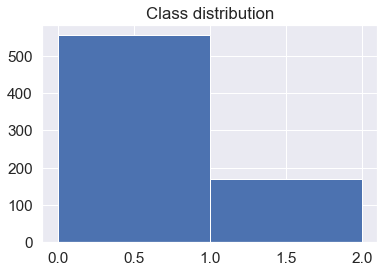

In [254]:
Y[0]
import seaborn as sns
import matplotlib.pyplot as plt

plt.hist(Y,bins=[0,1,2])
plt.title("Class distribution")
plt.show()
# print(np.mean(Y))

In [209]:
le_Y = LabelEncoder()
Y = le_Y.fit_transform(Y)

In [210]:
def encoder_X(index):
    le_X = LabelEncoder()
    X[:, index] = le_X.fit_transform(X[:, index])

In [211]:
to_be_encoded_indices = [0, 1, 2, 7]
for x in to_be_encoded_indices:
    encoder_X(x)
X[0]

array([0, 0, 1, '37640', '596', '37', '58', 0, '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0'], dtype=object)

In [212]:
pd.DataFrame(pd.DataFrame(X[:, 7])[0].value_counts())

,0
0,694
1,31


In [213]:
pd.DataFrame(pd.DataFrame(X[:, 3])[0].value_counts())

,0
2960,3
21060,3
36100,3
27740,2
81410,2
...,...
12490,1
23290,1
185910,1
148160,1


In [214]:
sc_X = StandardScaler()
X = sc_X.fit_transform(X)
X[0]

array([-0.72326291, -0.67547299,  0.59381137, -0.2301637 ,  0.06838283,
        0.44748281,  1.11632373, -0.21134944, -0.80192717, -0.64253757,
       -0.64887517, -0.26439159, -0.07448389,  0.        ,  0.        ,
        0.        , -0.31522995, -0.28079263])

# Training and test dataset

In [215]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)


In [216]:
pd.DataFrame(pd.DataFrame(Y_train)[0].value_counts())

,0
0,444
1,136


In [217]:
pd.DataFrame(pd.DataFrame(Y_test)[0].value_counts())

,0
0,111
1,34


# Decision tree

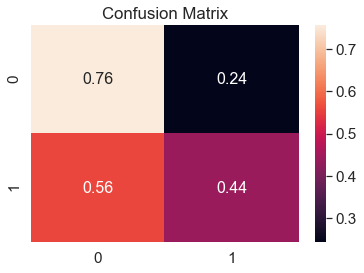

In [252]:
clf_dt = DecisionTreeClassifier(criterion = 'entropy')
clf_dt.fit(X_train, Y_train)
Y_pred_dt = clf_dt.predict(X_test)
disp=confusion_matrix(Y_test,Y_pred_dt,normalize="true")
df_disp=pd.DataFrame(disp)
sns.set(font_scale=1.4)
sns.heatmap(df_disp,annot=True,annot_kws={"size":16})
plt.title("Confusion Matrix")
plt.show()

In [219]:
score=clf_dt.score(X_train,Y_train)
score1=accuracy_score(Y_test, Y_pred_dt)

print(f"The training accuracy score is {score}")
print(f"The test accuracy score is {score1}")

The training accuracy score is 1.0
The test accuracy score is 0.6896551724137931


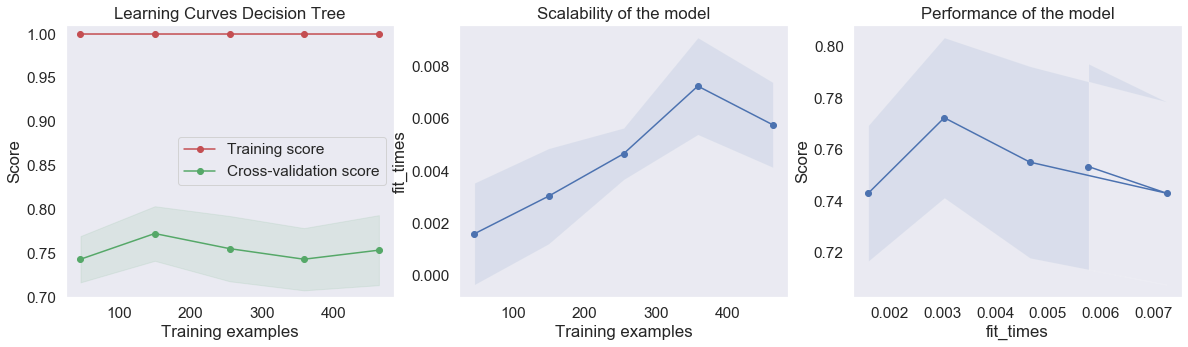

In [220]:
title = "Learning Curves Decision Tree"
plot_learning_curve(clf_dt, title, X_train, Y_train, axes=None, ylim=(0.7, 1.01), cv=None, n_jobs=4)
plt.show()

### https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

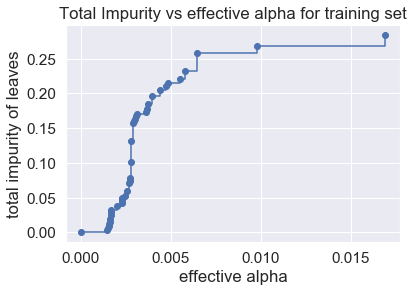

In [221]:
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_train, Y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")

ax.set_title("Total Impurity vs effective alpha for training set")

Number of nodes in the last tree is: 1 with ccp_alpha: 0.07432268315904605


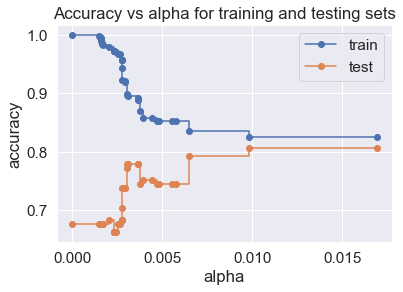

In [222]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, Y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]

train_scores = [clf.score(X_train, Y_train) for clf in clfs]
test_scores = [clf.score(X_test, Y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

# Neural Network

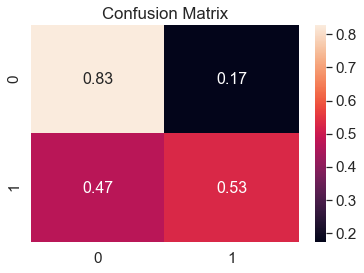

In [223]:
from sklearn.neural_network import MLPClassifier
#Initializing the MLPClassifier
classifier = MLPClassifier(hidden_layer_sizes=(200,100,50), max_iter=300,activation = 'relu',solver='adam',random_state=1)
classifier.fit(X_train, Y_train)
y_pred = classifier.predict(X_test)
disp=confusion_matrix(Y_test,y_pred,normalize="true")
df_disp=pd.DataFrame(disp)
sns.set(font_scale=1.4)
sns.heatmap(df_disp,annot=True,annot_kws={"size":16})
plt.title("Confusion Matrix")
plt.show()

In [224]:
score=classifier.score(X_train,Y_train)
score1=accuracy_score(Y_test, y_pred)

print(f"The training accuracy score is {score}")
print(f"The test accuracy score is {score1}")

The training accuracy score is 0.9844827586206897
The test accuracy score is 0.7586206896551724


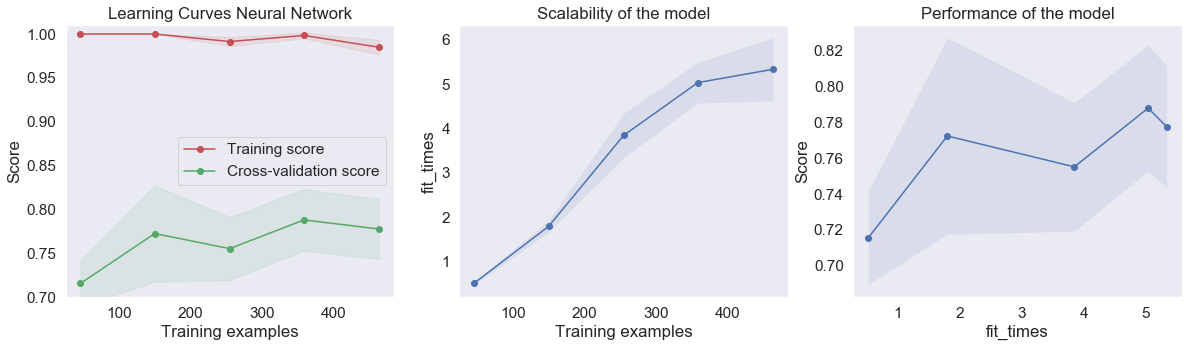

In [225]:
title = "Learning Curves Neural Network"
plot_learning_curve(classifier, title, X_train, Y_train, axes=None, ylim=(0.7, 1.01), cv=None, n_jobs=4)
plt.show()

# Boosting

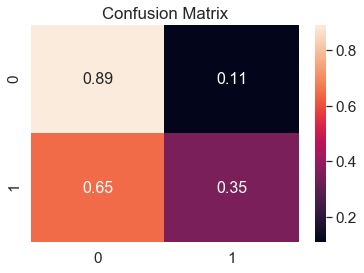

In [226]:
bo = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=5), n_estimators=2)
bo.fit(X_train, Y_train)
Y_pred_bo = bo.predict(X_test)
disp=confusion_matrix(Y_test,Y_pred_bo,normalize="true")
df_disp=pd.DataFrame(disp)
sns.set(font_scale=1.4)
sns.heatmap(df_disp,annot=True,annot_kws={"size":16})
plt.title("Confusion Matrix")
plt.show()

In [227]:
score=bo.score(X_train,Y_train)
score1=accuracy_score(Y_test, Y_pred_bo)

print(f"The training accuracy score is {score}")
print(f"The test accuracy score is {score1}")

The training accuracy score is 0.8775862068965518
The test accuracy score is 0.7655172413793103


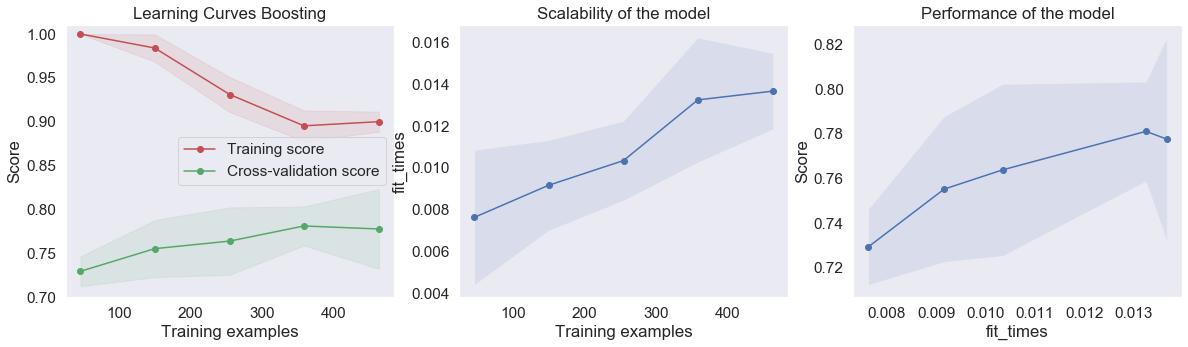

In [228]:
title = "Learning Curves Boosting"
plot_learning_curve(bo, title, X_train, Y_train, axes=None, ylim=(0.7, 1.01), cv=None, n_jobs=4)
plt.show()

# Support Vector Machines

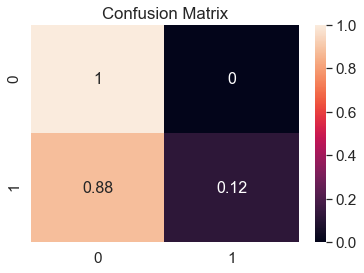

In [229]:
clf_lsvc = SVC(C=1.3, kernel='rbf', gamma=0.002,random_state=1)
clf_lsvc.fit(X_train, Y_train)
Y_pred_lsvc = clf_lsvc.predict(X_test)
# confusion_matrix(Y_test, Y_pred_lsvc)
disp=confusion_matrix(Y_test,Y_pred_lsvc,normalize="true")
df_disp=pd.DataFrame(disp)
sns.set(font_scale=1.4)
sns.heatmap(df_disp,annot=True,annot_kws={"size":16})
plt.title("Confusion Matrix")
plt.show()

In [230]:
score=clf_lsvc.score(X_train,Y_train)
score1=accuracy_score(Y_test, Y_pred_lsvc)

print(f"The training accuracy score is {score}")
print(f"The test accuracy score is {score1}")

The training accuracy score is 0.8068965517241379
The test accuracy score is 0.7931034482758621


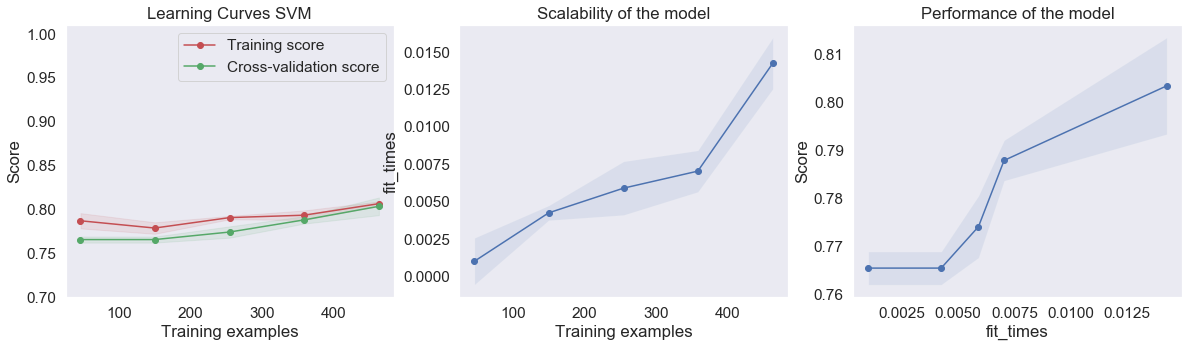

In [231]:
title = "Learning Curves SVM"
plot_learning_curve(clf_lsvc, title, X_train, Y_train, axes=None, ylim=(0.7, 1.01), cv=None, n_jobs=4)
plt.show()

The training accuracy score is 0.7327586206896551
The test accuracy score is 0.7724137931034483


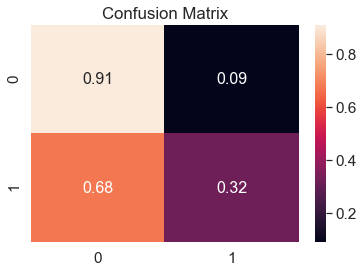

In [253]:
clf_lsvc = SVC(C=1.3, kernel='sigmoid', gamma='scale',  random_state=1)
clf_lsvc.fit(X_train, Y_train)
Y_pred_lsvc = clf_lsvc.predict(X_test)
score=clf_lsvc.score(X_train,Y_train)
score1=accuracy_score(Y_test, Y_pred_lsvc)

print(f"The training accuracy score is {score}")
print(f"The test accuracy score is {score1}")

disp=confusion_matrix(Y_test,Y_pred_lsvc,normalize="true")
df_disp=pd.DataFrame(disp)
sns.set(font_scale=1.4)
sns.heatmap(df_disp,annot=True,annot_kws={"size":16})
plt.title("Confusion Matrix")
plt.show()

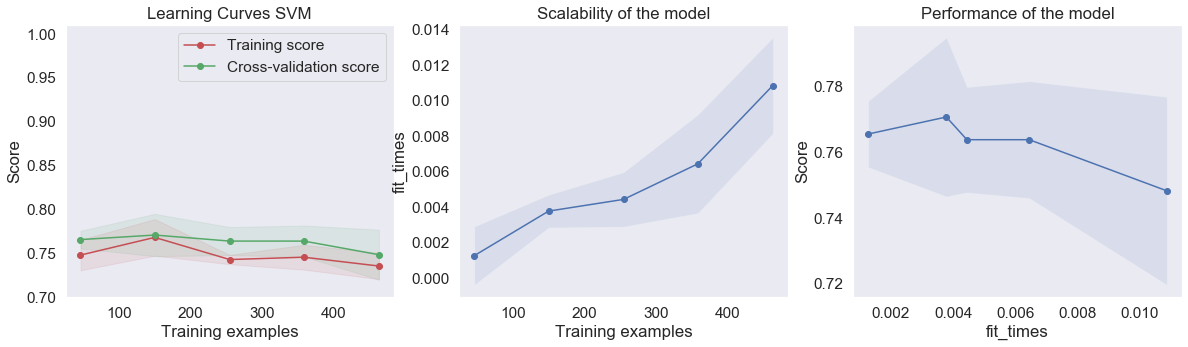

In [233]:
title = "Learning Curves SVM"
plot_learning_curve(clf_lsvc, title, X_train, Y_train, axes=None, ylim=(0.7, 1.01), cv=None, n_jobs=4)
plt.show()

# K-Nearest Neighbors

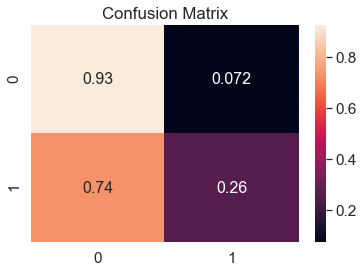

In [234]:
clf_knn = KNeighborsClassifier(n_neighbors = 5)
clf_knn.fit(X_train, Y_train)
Y_pred_knn = clf_knn.predict(X_test)
disp=confusion_matrix(Y_test,Y_pred_knn,normalize="true")
df_disp=pd.DataFrame(disp)
sns.set(font_scale=1.4)
sns.heatmap(df_disp,annot=True,annot_kws={"size":16})
plt.title("Confusion Matrix")
plt.show()

In [235]:
score=knn.score(X_train,Y_train)
score1=accuracy_score(Y_test, Y_pred_knn)

print(f"The training accuracy score is {score}")
print(f"The test accuracy score is {score1}")


The training accuracy score is 0.8103448275862069
The test accuracy score is 0.7724137931034483


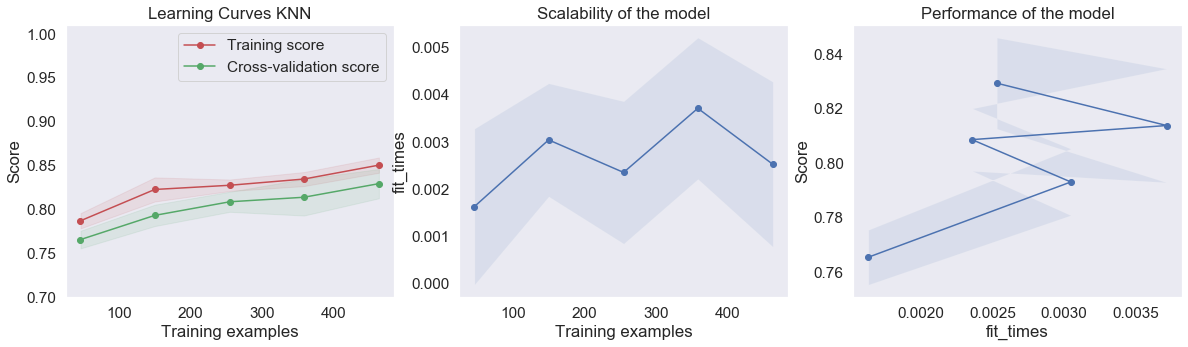

In [236]:
title = "Learning Curves KNN"
plot_learning_curve(clf_knn, title, X_train, Y_train, axes=None, ylim=(0.7, 1.01), cv=None, n_jobs=4)
plt.show()

Text(0, 0.5, 'Mean Error')

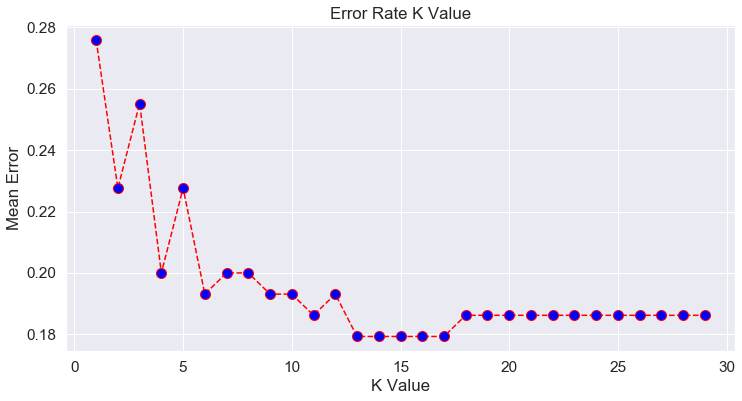

In [237]:
error = []

# Calculating error for K values between 1 and 30
for i in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, Y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != Y_test))

plt.figure(figsize=(12, 6))
plt.plot(range(1, 30), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

# Comparaison

In [238]:
model_accuracies['DT'] = accuracy_score(Y_test, Y_pred_dt)
model_accuracies['ANN'] = accuracy_score(Y_test, y_pred)
model_accuracies['Boosting'] = accuracy_score(Y_test, Y_pred_bo)
model_accuracies['SVM'] = accuracy_score(Y_test, Y_pred_lsvc)
model_accuracies['KNN'] = accuracy_score(Y_test, Y_pred_knn)

In [239]:
model_accuracies

{'DT': 0.6896551724137931,
 'ANN': 0.7586206896551724,
 'Boosting': 0.7655172413793103,
 'SVM': 0.7724137931034483,
 'KNN': 0.7724137931034483}

#### Sikora M., Wrobel L.: Application of rule induction algorithms for analysis of data collected by seismic hazard monitoring systems in coal mines. Archives of Mining Sciences, 55(1), 2010, 91-114.